In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
import tensorflow as tf
import numpy as np
from numpy  import expand_dims
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(15)

Using TensorFlow backend.


In [9]:
img = tf.keras.preprocessing.image.load_img('cat.jpg')  # 이미지 객체임
data = tf.keras.preprocessing.image.img_to_array(img)   # data 만 추출
print(data.shape)
sample = expand_dims(data,0)  
print(sample.shape)

(612, 571, 3)
(1, 612, 571, 3)


In [3]:
# opencv 사용해 이미지 loaidng
data = cv2.imread('cat.jpg')
data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
sample = expand_dims(data,0)
print(sample.shape)

(1, 612, 571, 3)


## 수평, 수직 이동

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(    
    width_shift_range = 0.2) 
obj = generator.flow(sample, batch_size=1)   

In [12]:
# 할때마다 다른 이미지 나온다.
image = obj.next()
print(image.shape) 
print(image.dtype)
print(image)

(1, 612, 571, 3)
float32
[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]]


(612, 571, 3)


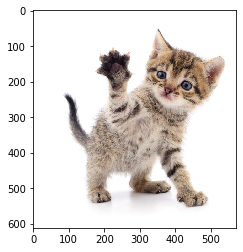

In [15]:
print(image[0].shape)

#plt.imshow(image[0].astype('uint8') )  
#  plt로 할때는 0~1사이로  혹은 타입을 uint8로 

plt.imshow(image[0]/255)  
#plt로 할때는 0~1사이로  혹은 타입을 uint8로 

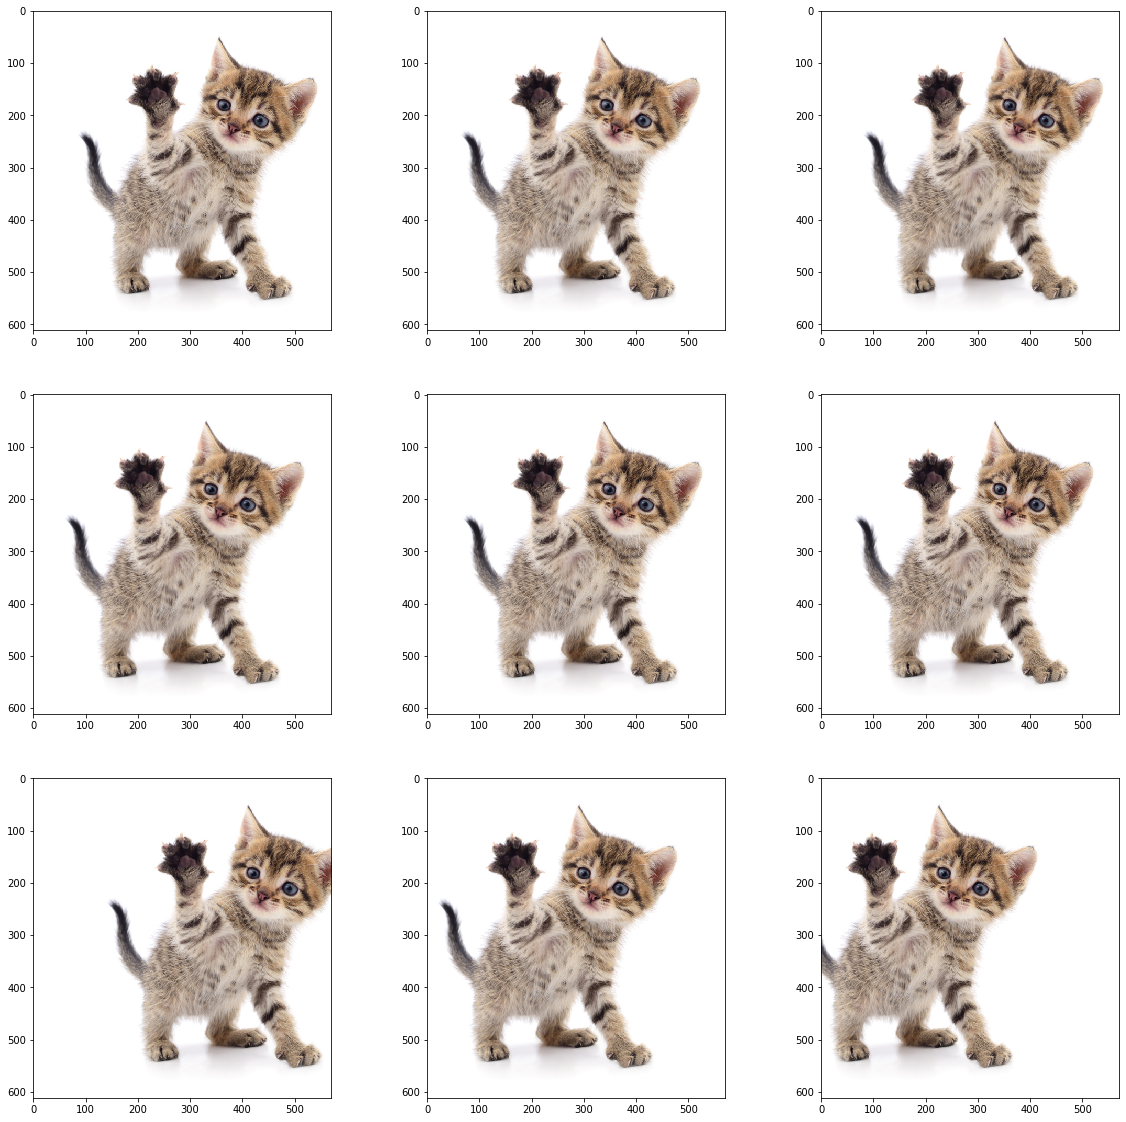

In [17]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(    
    width_shift_range = 0.2, rescale=1./255)   # rescale 해주면 정규화하고, imshow할때 type변한 필유없다.
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

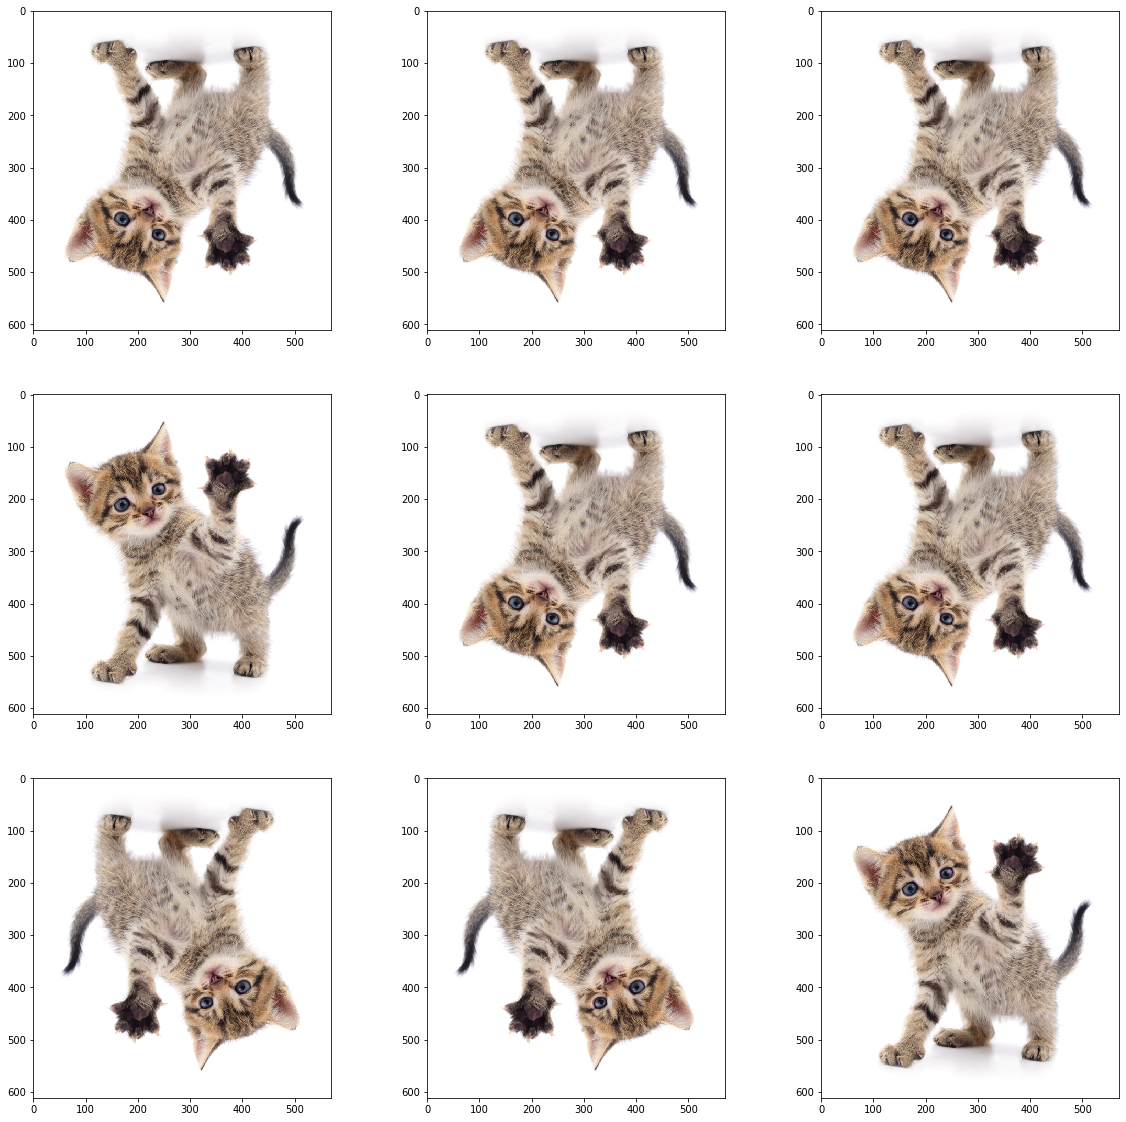

In [16]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    horizontal_flip = True, vertical_flip = True,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

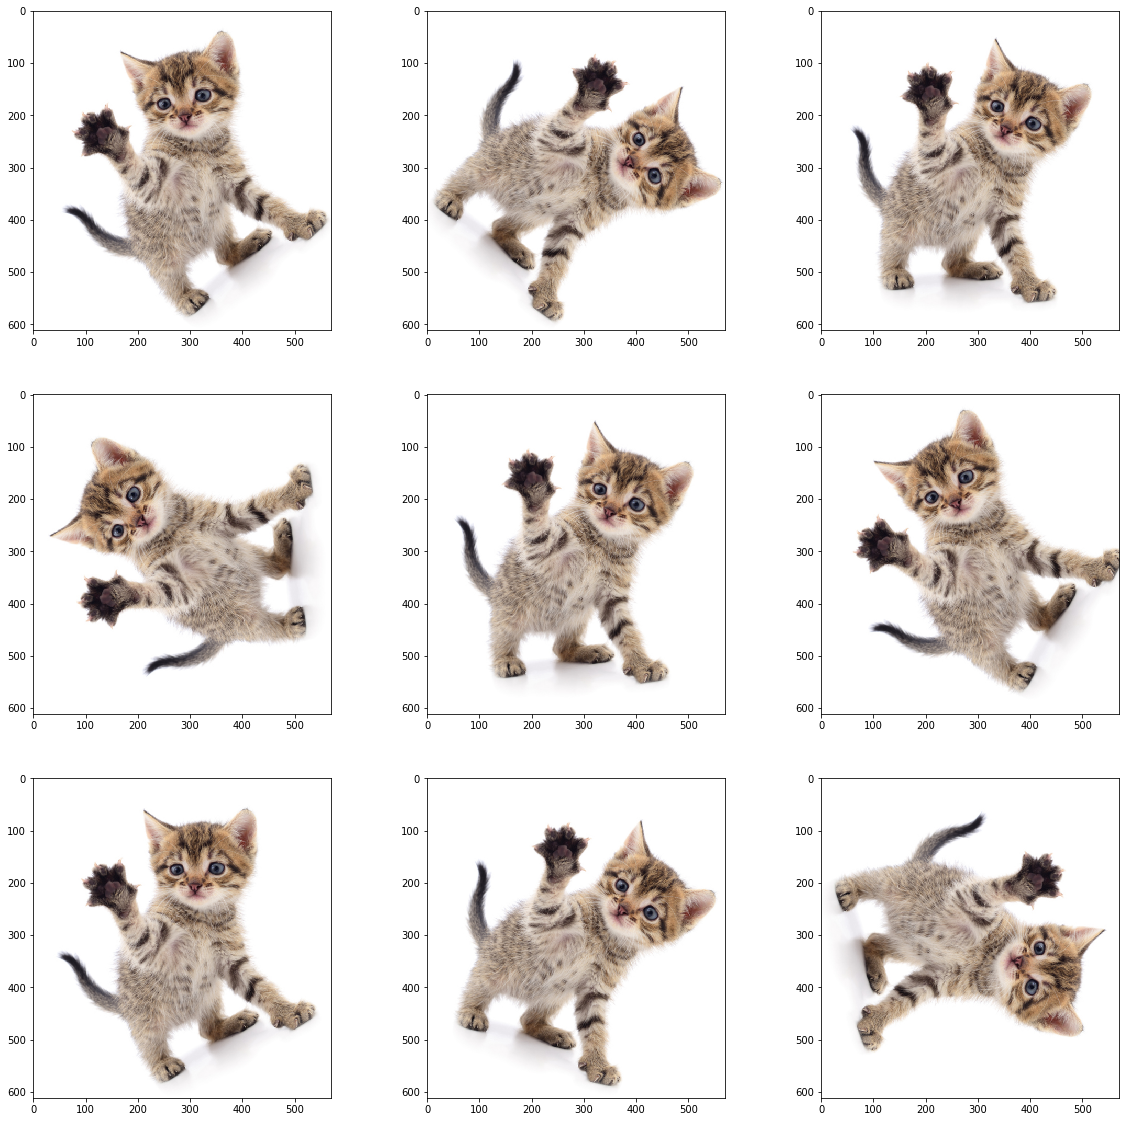

In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    rotation_range=90,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0]) 

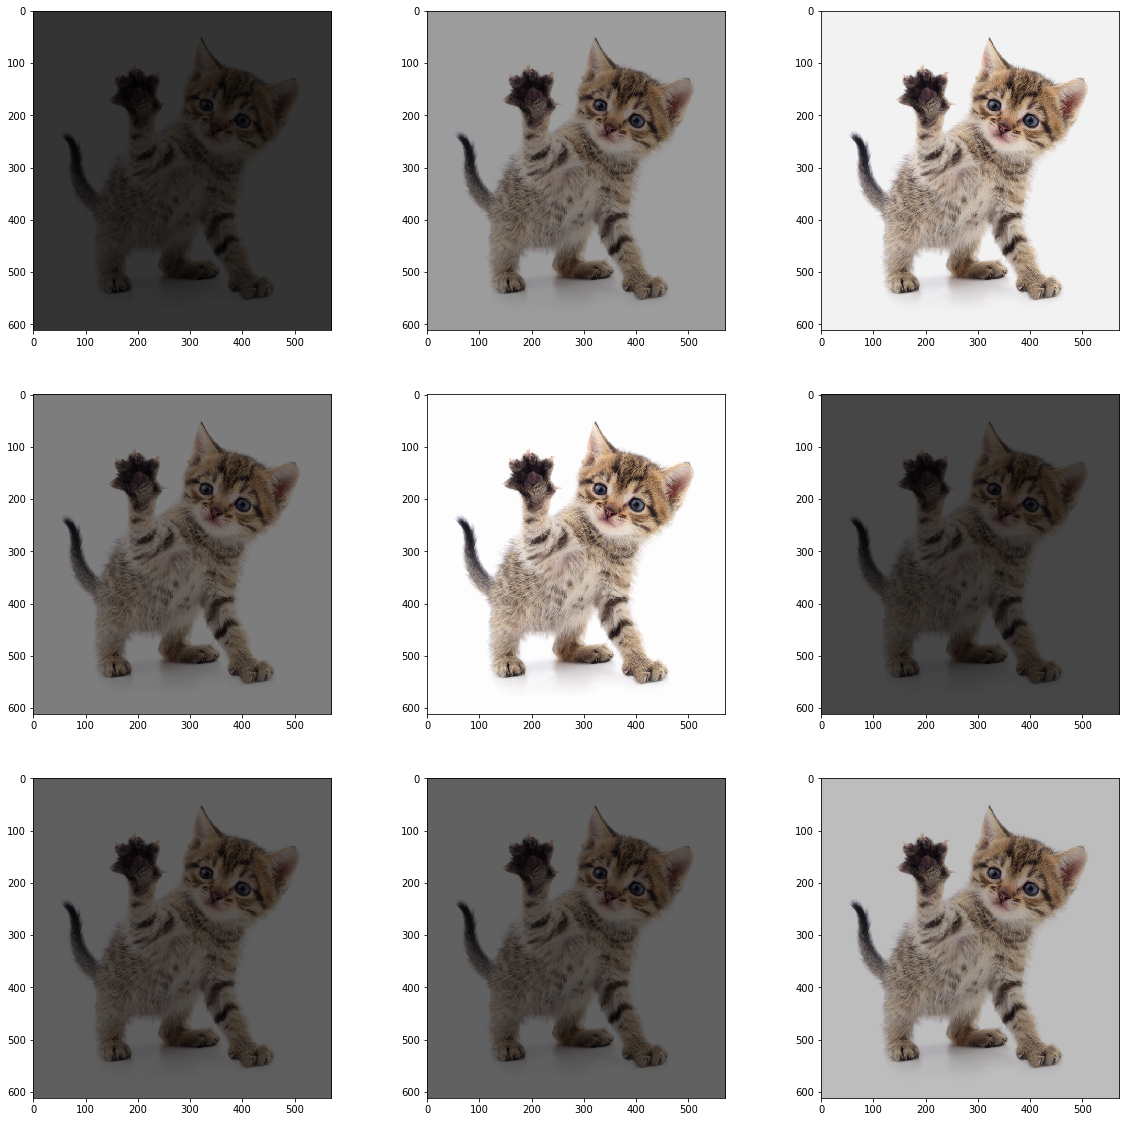

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    brightness_range=[0.2, 1.0],       
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

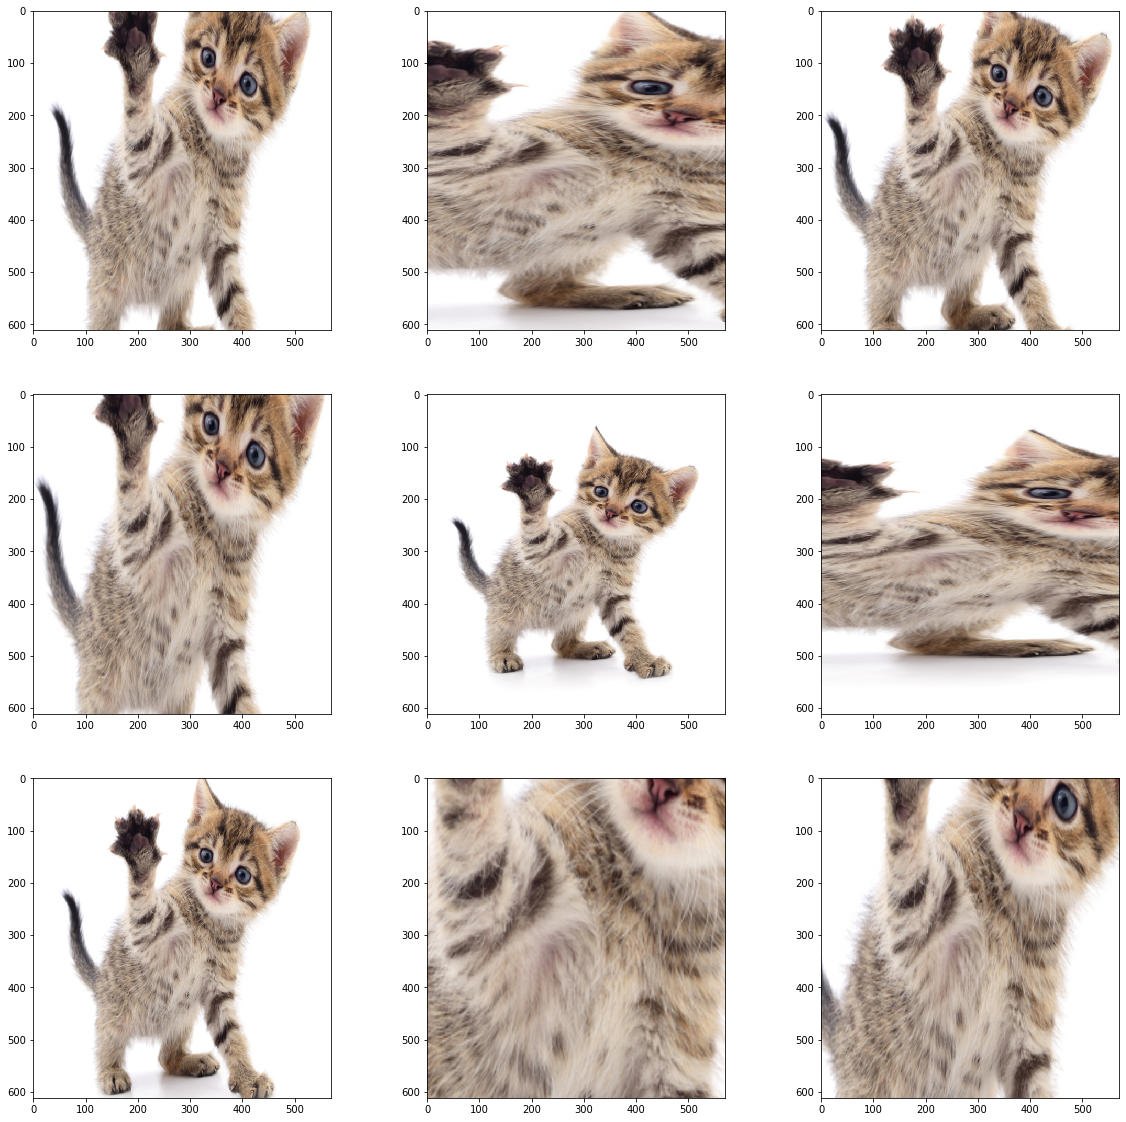

In [20]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    zoom_range=[0.2, 1.2],   
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

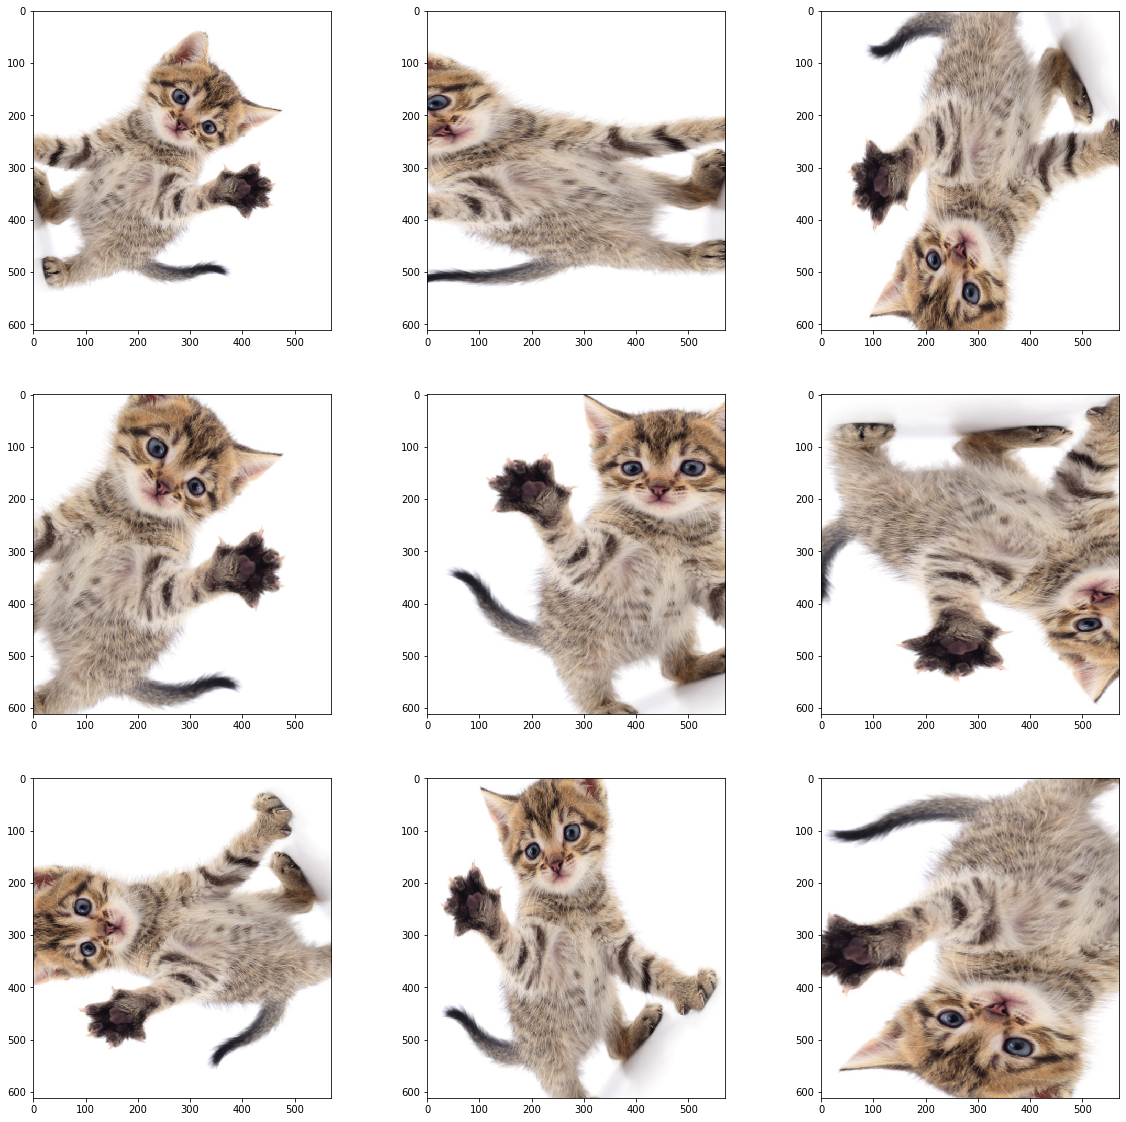

In [21]:
# 한꺼번에 적용하기
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    width_shift_range = 0.2,
    zoom_range=[0.5, 1.0],   
    horizontal_flip = True, vertical_flip = True,
    rotation_range=90,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   
fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0]) 

In [22]:
# 파일로 저장하기
obj = generator.flow(sample, batch_size=1, save_to_dir='tmp',  # 폴더는 생성되어 있어야 함
    save_prefix="image", save_format="jpg")    

for i in range(0, 5):
    obj.next() 

In [31]:
# 2.  디렉토리로 부터 augmentation
#augsample/c1/2개 이미지
#augsample/c2/6개 이미지    
#augsample/c3/1개 이미지    

obj = generator.flow_from_directory(
    'augsample',
    target_size = (150, 150), #읽어드릴 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 4,   #8개 이미지 중에서 한번에 생성할 이미지 수 
    class_mode = 'binary' )  #binary(label)  |  categorical(one-hot)

Found 9 images belonging to 3 classes.


In [32]:
iterations = 2

for i, (img, label) in enumerate(obj):
    n_img = len(label) # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break      
# 결과를 보면 lable은 1,1,1,0 처럼 꼭 c1과 c2에서 규일하게 생성되는것은 아니다.

[0. 1. 1. 0.]
(4, 150, 150, 3)
[2. 1. 1. 1.]
(4, 150, 150, 3)


In [33]:
# 저장하기
obj = generator.flow_from_directory(
    'augsample',
    target_size = (150, 150), #읽어드릴 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 4,   #8개 이미지 중에서 최대4개 만들어냄
    class_mode = 'binary',
    save_prefix="image", save_format="jpg",save_to_dir='tmp')

iterations = 2

for i, (img, label) in enumerate(obj):
    n_img = len(label)    # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break
# tmp 폴더하나에 8개이미지 출력된다.  class별로 저정할수 없나?( 좀더 찾아바야함)

Found 9 images belonging to 3 classes.
[1. 1. 2. 1.]
(4, 150, 150, 3)
[0. 0. 1. 1.]
(4, 150, 150, 3)


In [50]:
np.random.seed(5)


# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
                                   
img = load_img('hard_handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='hard_handwriting_shape/tmp', save_prefix='tri', save_format='png'):
    i += 1
    if i > 30: 
        break

In [51]:
        
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical', shuffle=False)

Found 45 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [52]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [53]:
# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=5, #200
        validation_data=test_generator,
        validation_steps=5)

# fit generator
# 배치단위로 train데이터를 생성하여 학습한다.

Epoch 1/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2060 - accuracy: 0.9153 - val_loss: 1.3630e-04 - val_accuracy: 0.7143
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0331 - accuracy: 0.9887 - val_loss: 5.2867e-05 - val_accuracy: 0.7857
Epoch 3/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0359 - accuracy: 0.9880 - val_loss: 7.4540e-04 - val_accuracy: 0.7143
Epoch 4/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0185 - accuracy: 0.9933 - val_loss: 5.9605e-08 - val_accuracy: 0.7857
Epoch 5/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0209 - accuracy: 0.9940 - val_loss: 0.0000e+00 - val_accuracy: 0.7857


In [54]:
# 모델 예측하기
print("-- Predict --")
output = model.predict_generator(test_generator,  steps = 5)    
# batch 사이즈가 3 , 15개가 생성됨
print(output)

T = test_generator.classes
print(T)
p = np.argmax(output, axis=1)
print(p)

sum((T == p)*1) / len(T)

-- Predict --
[[9.8410994e-01 1.5778052e-02 1.1209161e-04]
 [3.5362344e-05 3.1491368e-06 9.9996150e-01]
 [9.9770266e-01 2.6104663e-10 2.2973935e-03]
 [9.9990463e-01 1.2890648e-07 9.5224656e-05]
 [9.9903476e-01 4.1174621e-07 9.6485153e-04]
 [8.0553968e-05 9.9893540e-01 9.8403892e-04]
 [3.6432907e-10 2.9611078e-08 1.0000000e+00]
 [7.6102238e-05 9.7591317e-01 2.4010774e-02]
 [5.2884710e-01 2.5945815e-01 2.1169469e-01]
 [9.5865015e-13 1.2845435e-13 1.0000000e+00]
 [3.2423651e-13 7.8800732e-18 1.0000000e+00]
 [3.1532798e-07 1.0412002e-08 9.9999964e-01]
 [1.1461243e-09 2.4489594e-17 1.0000000e+00]
 [1.7542029e-17 3.8225305e-21 1.0000000e+00]]
[0 0 0 0 0 1 1 1 1 2 2 2 2 2]
[0 2 0 0 0 1 2 1 0 2 2 2 2 2]


0.7857142857142857

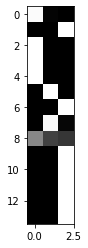

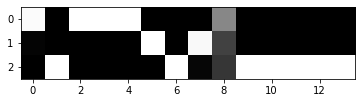

In [55]:
plt.imshow(output, cmap='gray')
plt.show() # 완전히 다른것으로 인식
plt.imshow(output.T, cmap='gray')

In [56]:
# 모델 평가하기
scores = model.evaluate_generator( test_generator, steps = 5)
print(scores[1])

0.7857142686843872


In [57]:
labels = ['C','R','T']

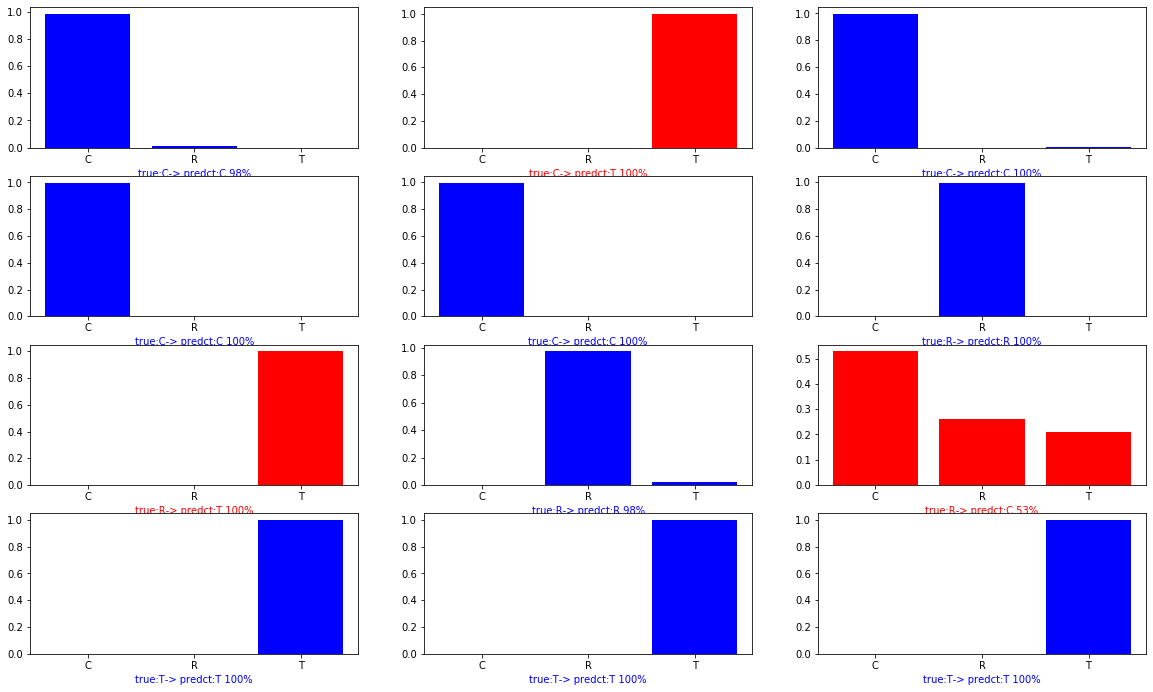

In [60]:
idx = [0,1,2,3,4,5,6,7,8,9,10,11]

plt.figure(figsize=(20,15))

cc = 3
rr = int(len(idx)/cc) + 1

for k in range(len(idx)):
    i = idx[k]
    c = "blue" if p[i]==T[i] else "red"
    plt.subplot(rr, cc, k+1)
    plt.bar(labels, output[i] ,color=c)
    plt.xlabel("true:{}-> predct:{} {:2.0f}%".format(
    labels[int(T[i])], labels[p[i]], 100*np.max(output[i], axis=0)), color=c)

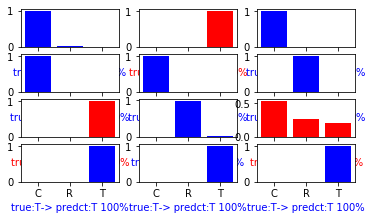

In [61]:
cc = 3
rr = int(len(idx)/cc) + 1

for k in range(len(idx)):
    i = idx[k]
    c = "blue" if p[i]==T[i] else "red"
    plt.subplot(rr, cc, k+1)
    plt.bar(labels, output[i] ,color=c)
    plt.xlabel("true:{}-> predct:{} {:2.0f}%".format(
    labels[int(T[i])], labels[p[i]], 100*np.max(output[i], axis=0)), color=c)